# 第3篇：缺失值

在我们拿到一个数据进行统计和分析时，很多时候我们都会遇到这样一个问题：数据缺失，比如学生信息中的某个人的学号和年龄为空，这也是大部分数据分析工作所会遇到的之一。缺失值是数据处理中经常会遇到的数据类型，对于这类数据的该如何处理将是本篇内容将要解决的问题。那么，我们首先会提出一个问题，pandas中有哪些数据是缺失值呢？

## 第1部分：何为缺失值
缺失值从字面意思上可以理解为当前数据项的值为空，在Python中，提起空值可以想到None，可能也会想到空字符串`""`,那么这两种是否就是pandas中的缺失值呢？这个疑问暂时保留，这里我们引入三种新的空值，np.nan和pd.NAT和pd.NA。下面我们将生成一个包含这几种空值的数据，看看pandas的缺失值到底是什么？

所需模块导入

In [1]:
import pandas as pd
import numpy as np

生成一个含有空值的DataFrame

In [2]:
index = pd.Series(data=["Tom", "Bob", "Mary", "James", "Andy", "Alice"], name="name")
data = {
    "age": [18, 30, None, 40, np.nan, 30],
    "city": ["北京", "上海", pd.NA, "深圳", "", "晋城"],
    "sex": [None, "male", "female", "male", np.nan, "unknown"],
    "birth": ["2000-02-10", "2001-12-12", None, "1978-08-08", pd.NaT, "1988-10-17"]
}
user_info = pd.DataFrame(data=data, index=index)
user_info

,age,city,sex,birth
name,,,,
Tom,18.0,北京,None,2000-02-10
Bob,30.0,上海,male,2001-12-12
Mary,NaN,<NA>,female,None
James,40.0,深圳,male,1978-08-08
Andy,NaN,,NaN,NaT
Alice,30.0,晋城,unknown,1988-10-17


In [3]:
user_info.dtypes

age      float64
city      object
sex       object
birth     object
dtype: object

我们生成了一个包含None、""、np.nan、pd.NAT、pd.NA的DataFrame，从生成的数据打印结果来看，每种数据类型都有自己的表示方式，下面我们查看一下他们中的哪些属于pandas中的缺失值。

### 判断缺失值
判断缺失值有两种方式
- isna和notna，
- isnull和notnull

这两种方法的效果是一样的，Series和DataFrame均有此方法。

In [4]:
user_info.isna()

,age,city,sex,birth
name,,,,
Tom,False,False,True,False
Bob,False,False,False,False
Mary,True,True,False,True
James,False,False,False,False
Andy,True,False,True,True
Alice,False,False,False,False


In [5]:
user_info.isnull()

,age,city,sex,birth
name,,,,
Tom,False,False,True,False
Bob,False,False,False,False
Mary,True,True,False,True
James,False,False,False,False
Andy,True,False,True,True
Alice,False,False,False,False


In [6]:
pd.isna, pd.isnull

(<function pandas.core.dtypes.missing.isna(obj)>,
 <function pandas.core.dtypes.missing.isna(obj)>)

从上面打印结果来看，除了空字符串不属于缺失值以外，None、np.nan、pd.NA、pd.NAT均是缺失值。这几种缺失值类型有什么区别呢？

### 缺失值类型

#### None: python对象类型的缺失值
pandas可以使用None作为缺失值标签，它是一个python对象，它不能作为Numpy/pandas数组类型的缺失值，只能用于'object'数组类型（即由python对象构成的数组）

首先来回顾一下None的运算

In [7]:
None == None

True

In [8]:
# None + None

# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# <ipython-input-31-87684764322b> in <module>
# ----> 1 None + None

# TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

None在bool类型的Series中为False

In [9]:
pd.Series([None], dtype='bool')

0    False
dtype: bool

None在bool类型的Series中不会改变其类型

In [10]:
pd.Series([True, None], dtype='bool')

0     True
1    False
dtype: bool

None和数字在一起时，None自动转换为np.nan，Series自动转换为float64类型。

In [11]:
pd.Series([1, None])

0    1.0
1    NaN
dtype: float64

除非手动指定数据类型为O(object)类型，即表示任何Python数据类型。

In [12]:
pd.Series([1, None], dtype='O')

0       1
1    None
dtype: object

总结：None表示Python数据类型中的缺失值，即Series类型为object时None才会为None，其他类型时会转换成对应的数据类型，比如bool类型时会转换成False,int类型时会转换成pd.nan。

#### NaN：数值类型的缺失值
NaN: Not a Number，是在任何系统中都兼容的特殊浮点数

np.nan不等于自己

In [13]:
np.nan == np.nan

False

In [14]:
np.nan == 0

False

In [15]:
np.nan == None

False

np.nan在numpy中的类型为浮点，由此导致数据集读入时，即使原来是整数的列，只要有缺失值就会变为浮点型

In [16]:
type(np.nan)

float

In [17]:
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

In [18]:
pd.Series([1, np.nan, 3])

0    1.0
1    NaN
2    3.0
dtype: float64

此外，对于包含布尔类型和np.nan的Series，会自动转换为object类型

In [19]:
pd.Series([True,False])

0     True
1    False
dtype: bool

In [20]:
pd.Series([True,np.nan,False])

0     True
1      NaN
2    False
dtype: object

如果是np.nan填充，那么它的值会自动变为True而不是False

In [21]:
pd.Series([True,np.nan,False], dtype='bool')

0     True
1     True
2    False
dtype: bool

但当修改一个布尔列表时，会改变列表类型，而不是赋值为True

In [22]:
s = pd.Series([True,False],dtype='bool')
s[1]=np.nan
s

0    1.0
1    NaN
dtype: float64

总结：np.nan是numpy和pandas中的缺失值表示，其自身数据类型为float,但其与空值不同的是，转为布尔值为True,当Series同时包含bool和np.nan时，转为object类型，当Series同时包含int和np.nan时，转为float64类型，两个np.nan不相等。

#### pd.NAT：时间类型的缺失值
NaT是针对时间序列的缺失值，是Pandas的内置类型，可以完全看做时序版本的np.nan，与自己不等

In [23]:
s_time = pd.Series([pd.Timestamp('20210120')])
s_time

0   2021-01-20
dtype: datetime64[ns]

In [24]:
s_time[1] = None
s_time

0   2021-01-20
1          NaT
dtype: datetime64[ns]

In [25]:
s_time[2] = np.nan
s_time

0   2021-01-20
1          NaT
2          NaT
dtype: datetime64[ns]

In [26]:
s_time[3] = pd.NaT
s_time

0   2021-01-20
1          NaT
2          NaT
3          NaT
dtype: datetime64[ns]

In [27]:
type(pd.NaT)

pandas._libs.tslibs.nattype.NaTType

In [28]:
pd.NaT == pd.NaT

False

In [29]:
pd.Series([True,False])

0     True
1    False
dtype: bool

In [30]:
pd.Series([True,pd.NaT,False])

0     True
1      NaT
2    False
dtype: object

In [31]:
pd.Series([True,pd.NaT,False], dtype='bool')

0     True
1     True
2    False
dtype: bool

#### Nullable类型与NA符号

这是Pandas在1.0新版本中引入的重大改变，其目的就是为了（在若干版本后）解决之前出现的混乱局面，统一缺失值处理方法
> "The goal of pd.NA is provide a “missing” indicator that can be used consistently across data types (instead of np.nan, None or pd.NaT depending on the data type)."——User Guide for Pandas v-1.0

官方鼓励用户使用新的数据类型和缺失类型pd.NA

**Nullable整形**  
对于该种类型而言，它与原来标记int上的符号区别在于首字母大写：'Int'

In [32]:
s_original = pd.Series([1, 2], dtype="int64")
s_original

0    1
1    2
dtype: int64

In [33]:
s_new = pd.Series([1, 2], dtype="Int64")
s_new

0    1
1    2
dtype: Int64

它的好处就在于，其中前面提到的三种缺失值都会被替换为统一的NA符号，且不改变数据类型

In [34]:
s_original[1] = np.nan

In [35]:
s_new[1] = np.nan
s_new

0       1
1    <NA>
dtype: Int64

In [36]:
s_new[1] = None
s_new

0       1
1    <NA>
dtype: Int64

In [37]:
s_new[1] = pd.NaT
s_new

0       1
1    <NA>
dtype: Int64

**Nullable布尔**  
对于该种类型而言，作用与上面的类似，记号为boolean

In [38]:
s_original = pd.Series([1, 0], dtype="bool")
s_original

0     True
1    False
dtype: bool

In [39]:
s_new = pd.Series([0, 1], dtype="boolean")
s_new

0    False
1     True
dtype: boolean

In [40]:
s_original[0] = np.nan
s_original

0    NaN
1    0.0
dtype: float64

In [41]:
s_original = pd.Series([1, 0], dtype="bool") #此处重新加一句是因为前面赋值改变了bool类型
s_original[0] = None
s_original

0    False
1    False
dtype: bool

In [42]:
s_new[0] = np.nan
s_new

0    <NA>
1    True
dtype: boolean

In [43]:
s_new[0] = None
s_new

0    <NA>
1    True
dtype: boolean

In [44]:
s_new[0] = pd.NaT
s_new

0    <NA>
1    True
dtype: boolean

pd.NA作为索引

In [45]:
s = pd.Series(['dog','cat'])
s[s_new]

1    cat
dtype: object

**string类型**  
该类型是1.0的一大创新，目的之一就是为了区分开原本含糊不清的object类型，这里将简要地提及string，因为它是第7章的主题内容
它本质上也属于Nullable类型，因为并不会因为含有缺失而改变类型

In [46]:
s = pd.Series(['dog','cat'],dtype='string')
s

0    dog
1    cat
dtype: string

In [47]:
s[0] = np.nan
s

0    <NA>
1     cat
dtype: string

In [48]:
s[0] = None
s

0    <NA>
1     cat
dtype: string

In [49]:
s[0] = pd.NaT
s

0    <NA>
1     cat
dtype: string

此外，和object类型的一点重要区别就在于，在调用字符方法后，string类型返回的是Nullable类型，object则会根据缺失类型和数据类型而改变

In [50]:
s = pd.Series(["a", None, "b"], dtype="string")
s.str.count('a')

0       1
1    <NA>
2       0
dtype: Int64

In [51]:
s2 = pd.Series(["a", None, "b"], dtype="object")
s2.str.count("a")

0    1.0
1    NaN
2    0.0
dtype: float64

In [52]:
s.str.isdigit()

0    False
1     <NA>
2    False
dtype: boolean

In [53]:
s2.str.isdigit()

0    False
1     None
2    False
dtype: object

### 缺失值的运算与分组

#### 1. 加号与乘号规则

使用加法时，缺失值为0

In [54]:
s = pd.Series([2,3,np.nan,4])
s.sum()

9.0

使用乘法时，缺失值为1

In [55]:
s.prod()

24.0

使用累计函数时，缺失值自动略过

In [56]:
s.cumsum()

0    2.0
1    5.0
2    NaN
3    9.0
dtype: float64

In [57]:
s.cumprod()

0     2.0
1     6.0
2     NaN
3    24.0
dtype: float64

In [58]:
s.pct_change()

0         NaN
1    0.500000
2    0.000000
3    0.333333
dtype: float64

#### 2.groupby方法中的缺失值

自动忽略为缺失值的组

In [59]:
df_g = pd.DataFrame({'one':['A','B','C','D',np.nan],'two':np.random.randn(5)})
df_g

,one,two
0,A,0.013885
1,B,1.736015
2,C,1.939304
3,D,-1.120659
4,NaN,-0.560868


In [60]:
df_g.groupby('one').groups

{'A': [0], 'B': [1], 'C': [2], 'D': [3]}

## 第2部分：缺失值处理

### 1. 丢弃缺失值

Seriese 使用 dropna 比较简单，对于 DataFrame 来说，可以设置更多的参数。
> user_info.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
>- axis 参数用于控制行或列，跟其他不一样的是，axis=0 （默认）表示操作行，axis=1 表示操作列。
>- how 参数可选的值为 any（默认） 或者 all。any 表示一行/列有任意元素为空时即丢弃，all 一行/列所有值都为空时才丢弃。
>- subset 参数表示删除时只考虑的索引或列名。
>- thresh参数的类型为整数，它的作用是，比如 thresh=3，会在一行/列中至少有 3 个非空值时将其保留。

In [61]:
user_info

,age,city,sex,birth
name,,,,
Tom,18.0,北京,None,2000-02-10
Bob,30.0,上海,male,2001-12-12
Mary,NaN,<NA>,female,None
James,40.0,深圳,male,1978-08-08
Andy,NaN,,NaN,NaT
Alice,30.0,晋城,unknown,1988-10-17


axis参数: 0为行，1为列

In [62]:
user_info.dropna(axis=0)

,age,city,sex,birth
name,,,,
Bob,30.0,上海,male,2001-12-12
James,40.0,深圳,male,1978-08-08
Alice,30.0,晋城,unknown,1988-10-17


In [63]:
user_info.dropna(axis=1)

""
name
Tom
Bob
Mary
James
Andy
Alice


how参数: any或all,默认为any

In [64]:
# any：只有存在至少缺失值就删除该行或该列
user_info.dropna(axis=0,how='any')

,age,city,sex,birth
name,,,,
Bob,30.0,上海,male,2001-12-12
James,40.0,深圳,male,1978-08-08
Alice,30.0,晋城,unknown,1988-10-17


In [65]:
# 一行数据所有字段都为空值才删除
user_info.dropna(axis=0,how='all')

,age,city,sex,birth
name,,,,
Tom,18.0,北京,None,2000-02-10
Bob,30.0,上海,male,2001-12-12
Mary,NaN,<NA>,female,None
James,40.0,深圳,male,1978-08-08
Andy,NaN,,NaN,NaT
Alice,30.0,晋城,unknown,1988-10-17


subset参数：限定列中查找缺失值是否满足条件

In [66]:
# 一行数据中只要 city 或 sex 存在空值即删除
user_info.dropna(axis=0, how="any", subset=["city", "sex"])

,age,city,sex,birth
name,,,,
Bob,30.0,上海,male,2001-12-12
James,40.0,深圳,male,1978-08-08
Alice,30.0,晋城,unknown,1988-10-17


### 2. 填充缺失值

#### fillna(): 填充缺失值
除了可以丢弃缺失值外，也可以填充缺失值，最常见的是使用 fillna 完成填充。
> fillna(value=None,method=None,axis=None,inplace=False,limit=None,downcast=None)

fillna 这名字一看就是用来填充缺失值的。
填充缺失值时，常见的一种方式是使用一个标量来填充。例如，这里我将有缺失的年龄都填充为 0。

除了可以使用标量来填充之外，还可以使用前一个或后一个有效值来填充。
设置参数 method='pad' 或 method='ffill' 可以使用前一个有效值来填充。
设置参数 method='bfill' 或 method='backfill' 可以使用后一个有效值来填充。

In [67]:
user_info

,age,city,sex,birth
name,,,,
Tom,18.0,北京,None,2000-02-10
Bob,30.0,上海,male,2001-12-12
Mary,NaN,<NA>,female,None
James,40.0,深圳,male,1978-08-08
Andy,NaN,,NaN,NaT
Alice,30.0,晋城,unknown,1988-10-17


In [68]:
user_info.age.fillna(0)

name
Tom      18.0
Bob      30.0
Mary      0.0
James    40.0
Andy      0.0
Alice    30.0
Name: age, dtype: float64

In [69]:
user_info.age.fillna(method="ffill")

name
Tom      18.0
Bob      30.0
Mary     30.0
James    40.0
Andy     40.0
Alice    30.0
Name: age, dtype: float64

In [70]:
user_info.age.fillna(method="backfill")

name
Tom      18.0
Bob      30.0
Mary     40.0
James    40.0
Andy     30.0
Alice    30.0
Name: age, dtype: float64

#### interpolate()：插值
除了通过 fillna 方法来填充缺失值外，还可以通过 interpolate 方法来填充。默认情况下使用线性差值，可以是设置 method 参数来改变方式。　
> interpolate(method: str = "linear",axis: Axis = 0,limit: Optional[int] = None,inplace: bool_t = False,limit_direction: Optional[str] = None,limit_area: Optional[str] = None, downcast: Optional[str] = None)

In [71]:
user_info.age.interpolate()

name
Tom      18.0
Bob      30.0
Mary     35.0
James    40.0
Andy     35.0
Alice    30.0
Name: age, dtype: float64

##### 线性插值
（a）索引无关的线性插值
默认状态下，interpolate会对缺失的值进行线性插值

In [72]:
s = pd.Series([1,10,15,-5,-2,np.nan,np.nan,28])
s

0     1.0
1    10.0
2    15.0
3    -5.0
4    -2.0
5     NaN
6     NaN
7    28.0
dtype: float64

In [73]:
s.interpolate()

0     1.0
1    10.0
2    15.0
3    -5.0
4    -2.0
5     8.0
6    18.0
7    28.0
dtype: float64

<AxesSubplot:>

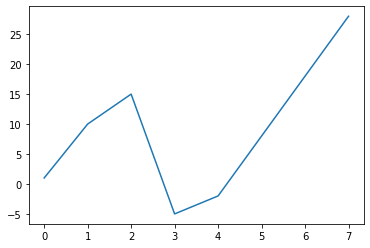

In [74]:
s.interpolate().plot()

此时的插值与索引无关

In [75]:
s.index = np.sort(np.random.randint(50,300,8))
s.interpolate()
# 值不变

62      1.0
77     10.0
96     15.0
119    -5.0
121    -2.0
212     8.0
263    18.0
265    28.0
dtype: float64

<AxesSubplot:>

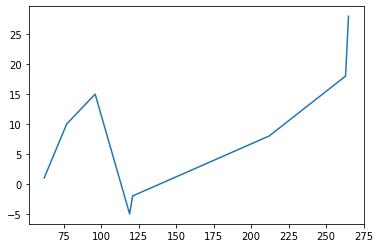

In [76]:
s.interpolate().plot()
# 后面三个点不是线性的（如果几乎为线性函数，请重新运行上面的一个代码块，这是随机性导致的）

(b) 与索引有关的插值  
method中的index和time选项可以使插值线性地依赖索引，即插值为索引的线性函数

<AxesSubplot:>

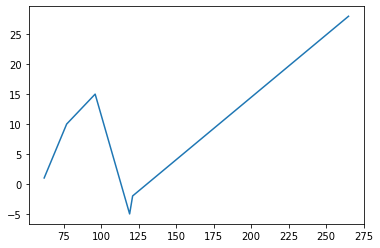

In [77]:
s.interpolate(method='index').plot()
#可以看到与上面的区别

如果索引是时间，那么可以按照时间长短插值，对于时间序列将在后续章节详细介绍

In [78]:
s_t = pd.Series([0,np.nan,10]
        ,index=[pd.Timestamp('2020-05-01'),pd.Timestamp('2020-05-07'),pd.Timestamp('2020-06-03')])
s_t

2020-05-01     0.0
2020-05-07     NaN
2020-06-03    10.0
dtype: float64

<AxesSubplot:>

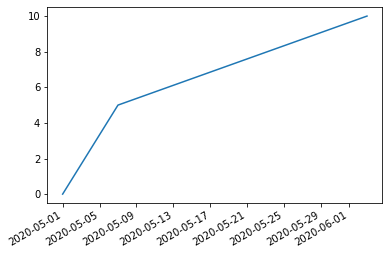

In [79]:
s_t.interpolate().plot()

<AxesSubplot:>

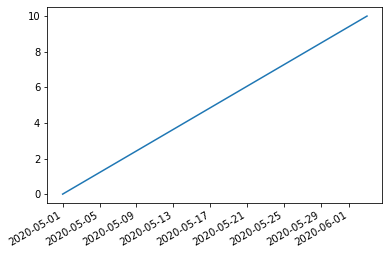

In [80]:
s_t.interpolate(method='time').plot()

##### 高级插值方法
此处的高级指的是与线性插值相比较，例如样条插值、多项式插值、阿基玛插值等（需要安装Scipy），方法详情请看[这里](https://pandas.pydata.org/pandas-docs/version/1.0.0/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate)  
关于这部分仅给出一个官方的例子，因为插值方法是数值分析的内容，而不是Pandas中的基本知识：

<AxesSubplot:>

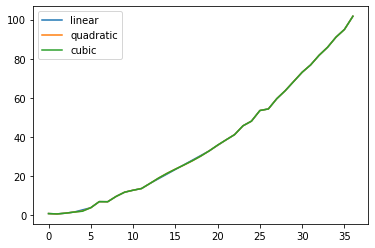

In [81]:
ser = pd.Series(np.arange(1, 10.1, .25) ** 2 + np.random.randn(37))
missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser[missing] = np.nan
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()

##### interpolate中的限制参数

（a）limit表示最多插入多少个

In [82]:
s = pd.Series([1,np.nan,np.nan,np.nan,5])
s.interpolate(limit=2)

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

（b）limit_direction表示插值方向，可选forward,backward,both，默认前向

In [83]:
s = pd.Series([np.nan,np.nan,1,np.nan,np.nan,np.nan,5,np.nan,np.nan,])
s.interpolate(limit_direction='backward')

0    1.0
1    1.0
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    NaN
8    NaN
dtype: float64

（c）limit_area表示插值区域，可选inside,outside，默认None

In [84]:
s = pd.Series([np.nan,np.nan,1,np.nan,np.nan,np.nan,5,np.nan,np.nan,])
s.interpolate(limit_area='inside')

0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    NaN
8    NaN
dtype: float64

In [85]:
s = pd.Series([np.nan,np.nan,1,np.nan,np.nan,np.nan,5,np.nan,np.nan,])
s.interpolate(limit_area='outside')

0    NaN
1    NaN
2    1.0
3    NaN
4    NaN
5    NaN
6    5.0
7    5.0
8    5.0
dtype: float64

### 3. 替换缺失值

例如，在我们的存储的用户信息中，假定我们限定用户都是青年，出现了年龄为 40 的，我们就可以认为这是一个异常值。再比如，我们都知道性别分为男性（male）和女性（female），在记录用户性别的时候，对于未知的用户性别都记为了 “unknown”,很明显，我们也可以认为“unknown”是缺失值。此外，有的时候会出现空白字符串，这些也可以认为是缺失值。对于上面的这种情况，我们可以使用 replace 方法来替换缺失值。

In [86]:
index = pd.Series(data=["Tom", "Bob", "Mary", "James", "Andy", "Alice"], name="name")
data = {
    "age": [18, 30, None, 40, np.nan, 30],
    "city": ["北京", "上海", pd.NA, "深圳", " ", "晋城"],
    "sex": [None, "male", "female", "male", np.nan, "unknown"],
    "birth": ["2000-02-10", "2001-12-12", pd.NaT, "1978-08-08", np.nan, "1988-10-17"]
}
user_info = pd.DataFrame(data=data, index=index)
user_info

,age,city,sex,birth
name,,,,
Tom,18.0,北京,None,2000-02-10
Bob,30.0,上海,male,2001-12-12
Mary,NaN,<NA>,female,NaT
James,40.0,深圳,male,1978-08-08
Andy,NaN,,NaN,NaT
Alice,30.0,晋城,unknown,1988-10-17


In [87]:
user_info.age.replace(40,np.nan)

name
Tom      18.0
Bob      30.0
Mary      NaN
James     NaN
Andy      NaN
Alice    30.0
Name: age, dtype: float64

In [88]:
user_info.age.replace({40: np.nan})#制定一个映射字典

name
Tom      18.0
Bob      30.0
Mary      NaN
James     NaN
Andy      NaN
Alice    30.0
Name: age, dtype: float64

In [89]:
# 字典多列筛选
user_info.replace({"age": 40, "birth": pd.Timestamp("1978-08-08")}, np.nan)

,age,city,sex,birth
name,,,,
Tom,18.0,北京,None,2000-02-10
Bob,30.0,上海,male,2001-12-12
Mary,NaN,<NA>,female,NaT
James,NaN,深圳,male,NaT
Andy,NaN,,NaN,NaT
Alice,30.0,晋城,unknown,1988-10-17


In [90]:
user_info.sex.replace("unknown", np.nan)

name
Tom        None
Bob        male
Mary     female
James      male
Andy        NaN
Alice       NaN
Name: sex, dtype: object

In [91]:
user_info.city.replace(r'\s+', np.nan, regex=True)

name
Tom        北京
Bob        上海
Mary     <NA>
James      深圳
Andy      NaN
Alice      晋城
Name: city, dtype: object

除了我们自己手动丢弃、填充已经替换缺失值之外，我们还可以使用其他对象来填充。
例如有两个关于用户年龄的 Series，其中一个有缺失值，另一个没有，我们可以将没有的缺失值的 Series 中的元素传给有缺失值的。

In [92]:
age_new = user_info.age.copy()
age_new.fillna(20, inplace=True)
age_new

name
Tom      18.0
Bob      30.0
Mary     20.0
James    40.0
Andy     20.0
Alice    30.0
Name: age, dtype: float64

In [93]:
user_info.age.combine_first(age_new)

name
Tom      18.0
Bob      30.0
Mary     20.0
James    40.0
Andy     20.0
Alice    30.0
Name: age, dtype: float64

## 简单小结

由于数据的来源的复杂性、不确定性，数据中难免会存在字段值不全、缺失等情况，本文介绍了在pandas中，None、np.nan、pd.NaT和pd.NA都会被识别为缺失值，其中None特指Python对象数据类型的缺失值，np.nan表示numpy中的缺失值，np.nan的类型为float,pd.NaT特指为时间类型的缺失值，在 Pandas 1.0 以后为了统一对缺失值表示和处理，实验性地使用一个标量 pd.NA 来代表。接下来介绍了pandas中如何判断缺失值以及处理缺失值的几种方法，学会本篇内容之后，相信你已经对缺失值相关的操作技巧和知识有了一定的了解。